<a href="https://colab.research.google.com/github/axel-sirota/model_training_best_practices/blob/master/module3/ModelTraining_Mod3Demo1_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression: Predicting a Single Categorical Response


First let's download the dataset

In [12]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt


In [5]:

%%writefile get_data.sh
mkdir -p data
if [ ! -f data/glass.csv ]; then
  wget -O data/glass.csv https://www.dropbox.com/scl/fi/dv522a61am4dsc3vkfp4p/glass.csv?rlkey=6l9v685sw98plzj2myvtjpes6&dl=0
fi

Overwriting get_data.sh


In [6]:
!bash get_data.sh

In [7]:
glass = pd.read_csv('data/glass.csv')
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass.head(3)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


Linear regression is appropriate when we want to predict the value of a continuous target/response variable, but what about when we want to predict membership in a class or category?

**Examine the glass type column in the data set. What are the counts in each category?**

In [8]:
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64


Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Create a new `household` column that indicates whether or not a row is household glass, coded as 1 or 0, respectively.**


In [9]:
glass['household'] =  glass.glass_type.apply(lambda x: int(x/4))
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


Let's change our task, so that we're predicting the `household` category using `al`. Let's visualize the relationship to figure out how to do this.

**Make a scatter plot comparing `al` and `household`.**

Text(0, 0.5, 'household')

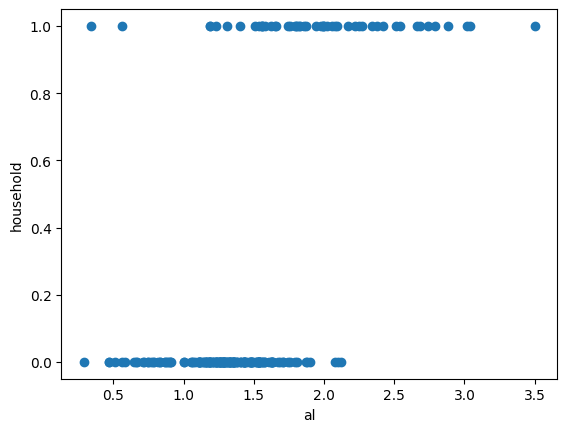

In [13]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

## Using Logistic Regression for Classification
---

Logistic regression is a more appropriate method for what we just did with a linear regression. The values output from a linear regression cannot be interpreted as probabilities of class membership since their values can be greater than 1 and less than 0. Logistic regression, on the other hand, ensures that the values output as predictions can be interpreted as probabilities of class membership.

**Import the `LogisticRegression` class from `linear_model` below and fit the same regression model predicting `household` from `al`.**


In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)
pred = logreg.predict(X)

In [16]:
logreg.predict_proba(X)[0:5]

array([[0.92973651, 0.07026349],
       [0.8547934 , 0.1452066 ],
       [0.77064733, 0.22935267],
       [0.87982403, 0.12017597],
       [0.89534349, 0.10465651]])

In [23]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]
glass_sorted = glass.sort_values(by='household_pred_prob', ascending=True)

**Plot the predicted class using the logistic regression**

As you can see, the class predictions are the same.

Text(0, 0.5, 'probability of household')

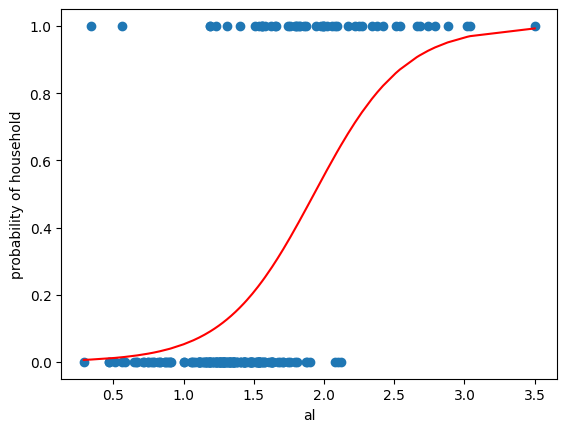

In [24]:
plt.scatter(glass_sorted.al, glass_sorted.household)
plt.plot(glass_sorted.al, glass_sorted.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('probability of household')

In [25]:
print(logreg.predict_proba([[1]]))
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[3]]))

[[0.94755733 0.05244267]]
[[0.4449707 0.5550293]]
[[0.03435025 0.96564975]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Testing with more features

In [26]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
X = glass[['na','fe','al']]
y = glass.household

# test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=99)

# logistic regression model fit
LR.fit(X_train,y_train)

# do prediction on test Data
y_pred=LR.predict(X_test)
print(y_pred)

# Calculate score
LR.score(X_test,y_test)

[0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0]


0.8837209302325582